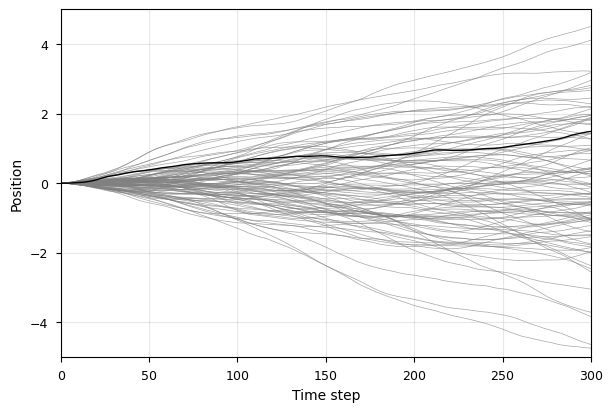

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the file
df = pd.read_csv('P2-1-positions.txt', delimiter=' ', header=None)

# Select first 10 columns
df_subset = df.iloc[:, :100]

# Create paperlike plot
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(6,4))
# Plot each column with lines, gray first then black
for i, column in enumerate(df_subset.columns):
    # Apply offset: if value > 5, subtract 10
    offset_data = df_subset[column].apply(lambda x: x - 10 if x > 5 else x)
    
    if i != 0:
        ax.plot(offset_data, linestyle='-', color='gray', linewidth=0.5, alpha=0.7)

# Plot first column in black on top
offset_data = df_subset[0].apply(lambda x: x - 10 if x > 5 else x)
ax.plot(offset_data, linestyle='-', color='black', linewidth=1)

ax.grid(True, alpha=0.3)
plt.xlim(0, 300)
plt.ylim(-5, 5)

plt.tight_layout()
ax.set_xlabel('Time step', fontsize=10)
ax.set_ylabel('Position', fontsize=10)
ax.tick_params(labelsize=9)
plt.show()

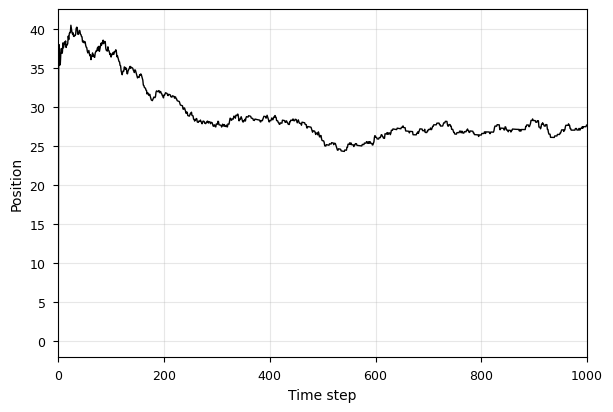

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the file
df = pd.read_csv('P2-1-msd.txt', delimiter=' ', header=None)

# Select first 10 columns
df_subset = df.iloc[:, :100]

# Create paperlike plot
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(6,4))
# Plot each column with lines, gray first then black
for i, column in enumerate(df_subset.columns):
    # Apply offset: if value > 5, subtract 10
    offset_data = df_subset[column].apply(lambda x: x - 10 if x > 5 else x)
    
    if i != 0:
        ax.plot(offset_data, linestyle='-', color='gray', linewidth=0.5, alpha=0.7)

# Plot first column in black on top
offset_data = df_subset[0].apply(lambda x: x - 10 if x > 5 else x)
ax.plot(offset_data, linestyle='-', color='black', linewidth=1)

ax.grid(True, alpha=0.3)
plt.xlim(0, 1000)
#plt.ylim(-5, 5)

#Compare with theoretical MSD as a function of different paremeters


plt.tight_layout()
ax.set_xlabel('Time step', fontsize=10)
ax.set_ylabel('Position', fontsize=10)
ax.tick_params(labelsize=9)
plt.show()

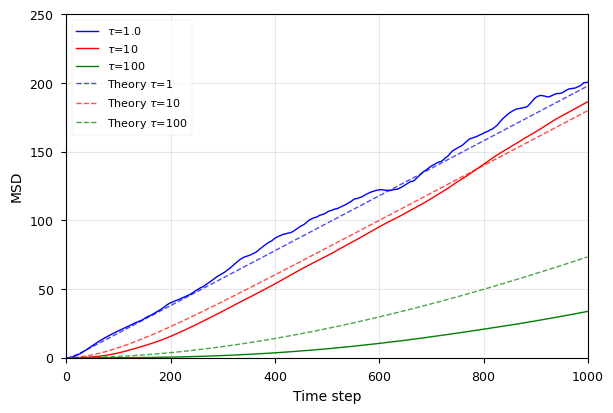

In [51]:
import numpy as np

# Read the file and separate datasets by blank lines
with open('P2-2-msd.txt', 'r') as f:
    lines = f.readlines()

# Split data into separate datasets
datasets = []
current_dataset = []
for line in lines:
    if line.strip() == '':
        if current_dataset:
            datasets.append(current_dataset)
            current_dataset = []
    else:
        current_dataset.append([float(x) for x in line.strip().split()])
if current_dataset:
    datasets.append(current_dataset)

# Convert to DataFrames
df_data = pd.DataFrame(datasets[0])
df_data2 = pd.DataFrame(datasets[1]) if len(datasets) > 1 else None
df_data3 = pd.DataFrame(datasets[2]) if len(datasets) > 2 else None

# Create plot
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(6,4))

# Plot the main data
ax.plot(df_data[0], linestyle='-', color='blue', linewidth=1, label='$\\tau$=1.0')

# Plot fit1 if available
if df_data2 is not None:
    ax.plot(df_data2[0], linestyle='-', color='red', linewidth=1, label='$\\tau$=10')

# Plot fit2 if available
if df_data3 is not None:
    ax.plot(df_data3[0], linestyle='-', color='green', linewidth=1, label='$\\tau$=100')
    
# Compare with theoretical lines as functions of time and tau for different tau values. 

# Create time array
time = np.arange(1000)

D = 1
dt=0.1

# Plot theoretical curves for each tau value
tau_values = [1, 10, 100]
colors = ['blue', 'red', 'green']
for tau, color in zip(tau_values, colors):
    msd_theory = 2* D * (time*dt  + tau * (np.exp(-time*dt  / tau) - 1))
    ax.plot(time, msd_theory, linestyle='--', color=color, linewidth=1, alpha=0.7, label=f'Theory $\\tau$={tau}')


ax.grid(True, alpha=0.3)
plt.xlim(0, 1000)
plt.ylim(0, 250)
#x log scale
ax.legend()
plt.tight_layout()
ax.set_xlabel('Time step', fontsize=10)
ax.set_ylabel('MSD', fontsize=10)
ax.tick_params(labelsize=9)
plt.show()

Found 21 data blocks
Found tau values: [1.0, 10.0, 100.0]
  tau=1.0: 1 snapshots, 51 points each
  tau=10.0: 2 snapshots, 96 points each
  tau=100.0: 18 snapshots, 321 points each


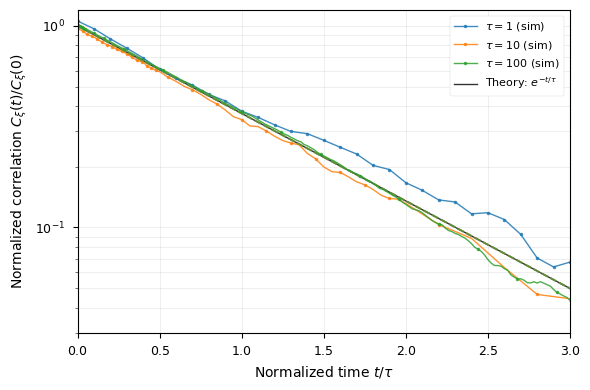


DATA COLLAPSE ANALYSIS

Theoretical form: C_ξ(t) = (D/τ) exp(-t/τ)
Normalized form:  C_ξ(t)/C_ξ(0) = exp(-t/τ)


τ = 1
──────────────────────────────────────────────────────────────────────
  C(0) = D/τ = 1.000000 (theory), 1.057770 (sim)
  Relative error: 5.78%
  Decay to 1/e at: t/τ = 1.000 (expected: 1.000)
  Fitted slope: -0.8839 (expected: -1.000)
  Slope error: 11.6%
  Data range: t/τ ∈ [0, 5.00]

τ = 10
──────────────────────────────────────────────────────────────────────
  C(0) = D/τ = 0.100000 (theory), 0.097206 (sim)
  Relative error: 2.79%
  Decay to 1/e at: t/τ = 0.950 (expected: 1.000)
  Fitted slope: -1.0379 (expected: -1.000)
  Slope error: 3.8%
  Data range: t/τ ∈ [0, 5.00]

τ = 100
──────────────────────────────────────────────────────────────────────
  C(0) = D/τ = 0.010000 (theory), 0.010143 (sim)
  Relative error: 1.43%
  Decay to 1/e at: t/τ = 1.020 (expected: 1.000)
  Fitted slope: -1.0607 (expected: -1.000)
  Slope error: 6.1%
  Data range: t/τ ∈ [0, 5.00]

KEY

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the file and separate datasets by blank lines
with open('P2-3-corr.txt', 'r') as f:
    lines = f.readlines()

# Split data into separate datasets
datasets = []
current_dataset = []
for line in lines:
    if line.strip() == '':
        if current_dataset:
            datasets.append(current_dataset)
            current_dataset = []
    else:
        try:
            current_dataset.append([float(x) for x in line.strip().split()])
        except:
            pass
if current_dataset:
    datasets.append(current_dataset)

print(f"Found {len(datasets)} data blocks")

# Group datasets by tau value
tau_groups = {}
for dataset in datasets:
    if len(dataset) == 0:
        continue
    df = pd.DataFrame(dataset, columns=['time', 'corr_sim', 'corr_theory', 'tau'])
    tau = df['tau'].iloc[0]
    if tau not in tau_groups:
        tau_groups[tau] = []
    tau_groups[tau].append(df)

print(f"Found tau values: {sorted(tau_groups.keys())}")

# Average over multiple snapshots for each tau
averaged_data = {}
for tau, dfs in tau_groups.items():
    print(f"  tau={tau}: {len(dfs)} snapshots, {len(dfs[0])} points each")
    
    # Get all unique time points
    all_times = np.unique(np.concatenate([df['time'].values for df in dfs]))
    
    # Interpolate all dataframes to common time grid
    all_corr = []
    for df in dfs:
        corr_interp = np.interp(all_times, df['time'].values, df['corr_sim'].values)
        all_corr.append(corr_interp)
    
    # Average
    avg_corr = np.mean(all_corr, axis=0)
    
    # Theory curve
    theory = np.interp(all_times, dfs[0]['time'].values, dfs[0]['corr_theory'].values)
    
    # Compute normalized quantities
    C0 = theory[0]  # D/tau
    norm_corr_sim = avg_corr / C0
    norm_corr_theory = theory / C0
    norm_time = all_times / tau
    
    averaged_data[tau] = {
        'time': all_times,
        'norm_time': norm_time,
        'norm_corr_sim': norm_corr_sim,
        'norm_corr_theory': norm_corr_theory,
        'C0': C0,
        'corr_sim': avg_corr
    }

# Create single figure - normalized time (DATA COLLAPSE)
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(6, 4))

# Colors
colors = {1.0: '#1f77b4', 10.0: '#ff7f0e', 100.0: '#2ca02c'}
tau_values = sorted(averaged_data.keys())

# Plot each tau
for tau in tau_values:
    data = averaged_data[tau]
    color = colors.get(tau, 'gray')
    
    # Filter positive values for log plot
    mask = data['norm_corr_sim'] > 0
    
    ax.semilogy(data['norm_time'][mask], data['norm_corr_sim'][mask], 
                linestyle='-', color=color, linewidth=1,
                marker='o', markersize=2.5, markevery=max(1, np.sum(mask)//25),
                label=f'$\\tau={tau:.0f}$ (sim)', alpha=0.85)
    
    # Theory (dashed, same color)
    mask_theory = data['norm_corr_theory'] > 0
    ax.semilogy(data['norm_time'][mask_theory], data['norm_corr_theory'][mask_theory], 
                linestyle='--', color=color, linewidth=1.3, alpha=0.6)

# Add universal theory curve (black solid line)
t_norm = np.linspace(0, 5, 300)
universal = np.exp(-t_norm)
ax.semilogy(t_norm, universal, 'k-', linewidth=1, alpha=0.8, 
            label='Theory: $e^{-t/\\tau}$', zorder=0)

# Formatting
ax.set_xlabel('Normalized time $t/\\tau$', fontsize=10)
ax.set_ylabel('Normalized correlation $C_\\xi(t) / C_\\xi(0)$', fontsize=10)
ax.grid(True, alpha=0.3, which='both', linestyle='-', linewidth=0.5)
ax.legend(loc='upper right', fontsize=8, framealpha=0.95)
ax.tick_params(labelsize=9)
ax.set_xlim(0, 3)
ax.set_ylim(3e-2, 1.2)



plt.tight_layout()
plt.savefig('correlation_collapse.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== ANALYSIS =====
print("\n" + "="*70)
print("DATA COLLAPSE ANALYSIS")
print("="*70)
print("\nTheoretical form: C_ξ(t) = (D/τ) exp(-t/τ)")
print("Normalized form:  C_ξ(t)/C_ξ(0) = exp(-t/τ)")
print("\n" + "="*70)

for tau in tau_values:
    data = averaged_data[tau]
    C0_theory = data['C0']
    C0_sim = data['corr_sim'][0]
    
    print(f"\nτ = {tau:.0f}")
    print(f"{'─'*70}")
    
    # Initial correlation
    print(f"  C(0) = D/τ = {C0_theory:.6f} (theory), {C0_sim:.6f} (sim)")
    print(f"  Relative error: {abs(C0_sim - C0_theory)/C0_theory*100:.2f}%")
    
    # Decay to 1/e
    target = 1.0 / np.e
    idx = np.argmin(np.abs(data['norm_corr_sim'] - target))
    t_decay_sim = data['norm_time'][idx]
    print(f"  Decay to 1/e at: t/τ = {t_decay_sim:.3f} (expected: 1.000)")
    
    # Exponential fit
    mask = (data['norm_corr_sim'] > 0) & (data['norm_time'] > 0.1) & (data['norm_time'] < 3)
    if np.sum(mask) > 10:
        log_corr = np.log(data['norm_corr_sim'][mask])
        times = data['norm_time'][mask]
        coeffs = np.polyfit(times, log_corr, 1)
        fitted_slope = coeffs[0]
        print(f"  Fitted slope: {fitted_slope:.4f} (expected: -1.000)")
        print(f"  Slope error: {abs(fitted_slope + 1.0)*100:.1f}%")
    
    print(f"  Data range: t/τ ∈ [0, {data['norm_time'][-1]:.2f}]")

print("\n" + "="*70)
print("KEY RESULT: All three curves should collapse onto the universal")
print("            exponential exp(-t/τ) when plotted in normalized variables!")
print("="*70)

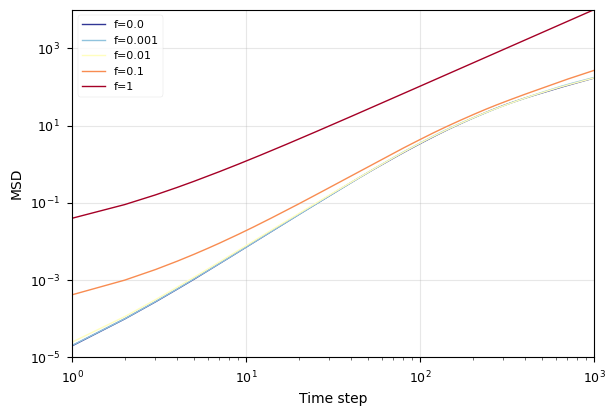

In [130]:
# Read the file and separate datasets by blank lines
try:
    with open('P2-4-corr.txt', 'r') as f:
        lines = f.readlines()
except FileNotFoundError:
    print('Not found')

# Split data into separate datasets
datasets = []
current_dataset = []
for line in lines:
    if line.strip() == '':
        if current_dataset:
            datasets.append(current_dataset)
            current_dataset = []
    else:
        current_dataset.append([float(x) for x in line.strip().split()])
if current_dataset:
    datasets.append(current_dataset)

# Convert to DataFrames dynamically
df_list = [pd.DataFrame(dataset) for dataset in datasets]

# Create plot
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(6,4))

# Plot all datasets dynamically with continuous color gradient from blue to red
import matplotlib.cm as cm
colors = [cm.RdYlBu_r(i / max(len(df_list) - 1, 1)) for i in range(len(df_list))]
tau_values = [0.0, 0.001, 0.01, 0.1, 1]

for i, df_corr in enumerate(df_list):
    if i < len(colors) and len(df_corr.columns) >= 2:
        ax.plot(df_corr[1], linestyle='-', color=colors[i], linewidth=1.0, label=f'f={tau_values[i]}')

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
ax.set_xlabel('Time step', fontsize=10)
ax.set_ylabel('MSD', fontsize=10)
ax.tick_params(labelsize=9)
plt.yscale('log')
plt.xscale('log')
plt.xlim(1, 1000)
plt.ylim(1e-5,1e4)
#plt.xlim(5,50)
#plt.ylim(5,50)


plt.show()


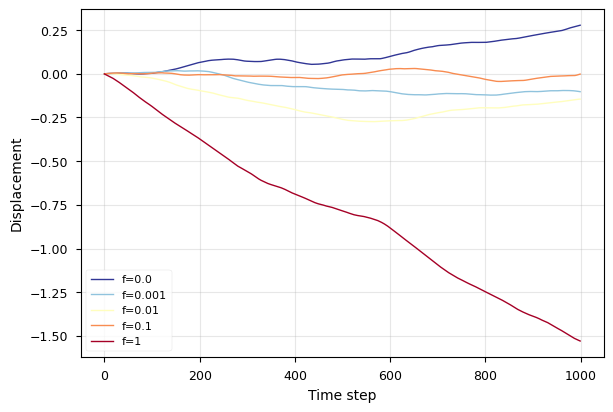

In [129]:
# Read the file and separate datasets by blank lines
try:
    with open('P2-4-dis.txt', 'r') as f:
        lines = f.readlines()
except FileNotFoundError:
    print('Not found')

# Split data into separate datasets
datasets = []
current_dataset = []
for line in lines:
    if line.strip() == '':
        if current_dataset:
            datasets.append(current_dataset)
            current_dataset = []
    else:
        current_dataset.append([float(x) for x in line.strip().split()])
if current_dataset:
    datasets.append(current_dataset)

# Convert to DataFrames dynamically
df_list = [pd.DataFrame(dataset) for dataset in datasets]

# Create plot
plt.style.use('seaborn-v0_8-paper')
fig, ax = plt.subplots(figsize=(6,4))

# Plot all datasets dynamically with continuous color gradient from blue to red
import matplotlib.cm as cm
colors = [cm.RdYlBu_r(i / max(len(df_list) - 1, 1)) for i in range(len(df_list))]
tau_values = [0.0, 0.001, 0.01, 0.1, 1]

for i, df_corr in enumerate(df_list):
    if i < len(colors) and len(df_corr.columns) >= 2:
        ax.plot(df_corr[1], linestyle='-', color=colors[i], linewidth=1.0, label=f'f={tau_values[i]}')

ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
ax.set_xlabel('Time step', fontsize=10)
ax.set_ylabel('Displacement', fontsize=10)
ax.tick_params(labelsize=9)
#plt.yscale('log')
#plt.xscale('log')
#plt.xlim(1, 1000)
#plt.ylim(1e-5,1e4)
#plt.xlim(5,50)
#plt.ylim(5,50)


plt.show()


Found 15 MSD blocks and 15 displacement blocks
Organized into 15 (tau, force) combinations
Tau values: [1.0, 10.0, 100.0]
Force values: [0.0, 0.001, 0.01, 0.1, 1.0]


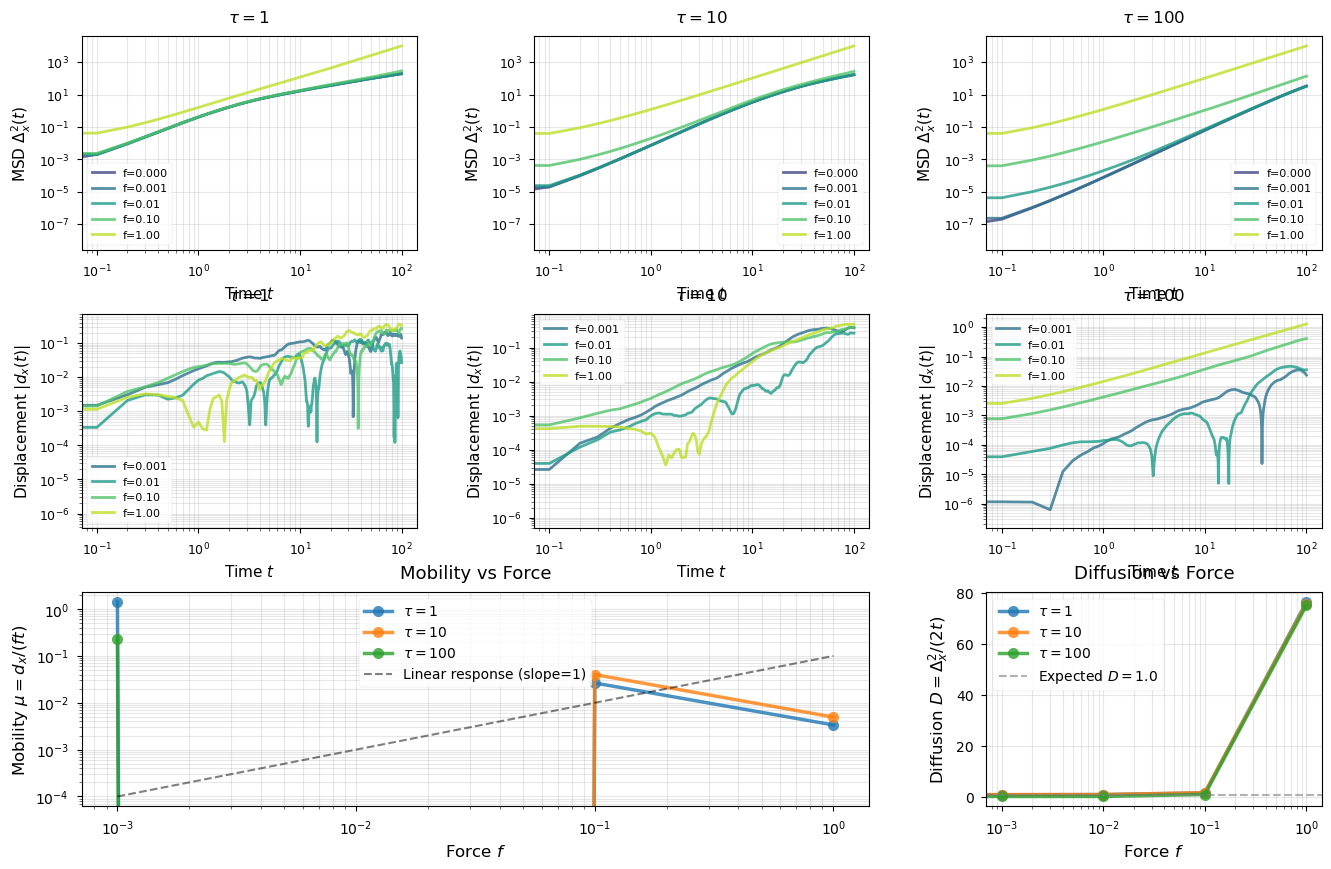


FORCE RESPONSE ANALYSIS

────────────────────────────────────────────────────────────────────────────────
τ = 1
────────────────────────────────────────────────────────────────────────────────

  Force    |    μ        |    D       | Regime
  -------------------------------------------------------
    0.000  |   0.00000  |   0.96981  | Linear
    0.001  |   1.41434  |   0.94243  | Linear
    0.010  |  -0.02669  |   1.00845  | Linear
    0.100  |   0.02647  |   1.68504  | Linear
    1.000  |   0.00336  |  76.52150  | Non-linear

  Average mobility (linear regime): μ = 0.693825
  Einstein relation: μ = D/k_B T
  Expected for D=1, k_B T=1: μ ≈ 1.0

────────────────────────────────────────────────────────────────────────────────
τ = 10
────────────────────────────────────────────────────────────────────────────────

  Force    |    μ        |    D       | Regime
  -------------------------------------------------------
    0.000  |   0.00000  |   0.96447  | Linear
    0.001  |  -3.80770  

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Read MSD and displacement data
with open('P2-4-corr.txt', 'r') as f:
    msd_lines = f.readlines()

with open('P2-4-dis.txt', 'r') as f:
    dis_lines = f.readlines()

def parse_data_blocks(lines):
    """Parse data separated by blank lines, grouped by tau then force"""
    blocks = []
    current_block = []
    
    for line in lines:
        if line.strip() == '':
            if current_block:
                blocks.append(current_block)
                current_block = []
        else:
            try:
                values = [float(x) for x in line.strip().split()]
                current_block.append(values)
            except:
                pass
    if current_block:
        blocks.append(current_block)
    
    return blocks

msd_blocks = parse_data_blocks(msd_lines)
dis_blocks = parse_data_blocks(dis_lines)

print(f"Found {len(msd_blocks)} MSD blocks and {len(dis_blocks)} displacement blocks")

# Organize data by tau and force
data_dict = {}  # {(tau, force): {'t': [], 'msd': [], 'dis': []}}

for msd_block, dis_block in zip(msd_blocks, dis_blocks):
    if len(msd_block) == 0:
        continue
    
    # Extract tau from first line (column 2)
    tau = msd_block[0][2]
    
    # Extract time, MSD, displacement
    df_msd = pd.DataFrame(msd_block, columns=['time', 'msd', 'tau'])
    df_dis = pd.DataFrame(dis_block, columns=['time', 'dis', 'tau'])
    
    # Infer force from the block order (cycles through forces for each tau)
    forces = [0.0, 0.001, 0.01, 0.1, 1.0]
    
    # Calculate which force this is based on block index
    block_idx = len([k for k in data_dict.keys() if k[0] == tau])
    if block_idx < len(forces):
        force = forces[block_idx]
    else:
        continue
    
    data_dict[(tau, force)] = {
        't': df_msd['time'].values,
        'msd': df_msd['msd'].values,
        'dis': df_dis['dis'].values
    }

print(f"Organized into {len(data_dict)} (tau, force) combinations")

# Extract unique tau and force values
tau_values = sorted(list(set([k[0] for k in data_dict.keys()])))
force_values = sorted(list(set([k[1] for k in data_dict.keys()])))

print(f"Tau values: {tau_values}")
print(f"Force values: {force_values}")

# Compute μ and D for each (tau, force) combination
results = []

for tau in tau_values:
    for force in force_values:
        if (tau, force) not in data_dict:
            continue
        
        data = data_dict[(tau, force)]
        t = data['t']
        msd = data['msd']
        dis = data['dis']
        
        # Use second half of data for steady state
        start_idx = len(t) // 2
        t_fit = t[start_idx:]
        msd_fit = msd[start_idx:]
        dis_fit = dis[start_idx:]
        
        # Compute mobility: μ = lim_{t→∞} d_x / (f*t)
        if force > 0:
            mu = dis_fit[-1] / (force * t_fit[-1])
        else:
            mu = 0
        
        # Compute diffusion: D = lim_{t→∞} Δ²_x(t) / (2t)
        # Linear fit to get slope
        if len(t_fit) > 10:
            slope_D, intercept, r_value, p_value, std_err = stats.linregress(t_fit, msd_fit)
            D_eff = slope_D / 2.0
        else:
            D_eff = msd_fit[-1] / (2 * t_fit[-1])
        
        results.append({
            'tau': tau,
            'force': force,
            'mu': mu,
            'D': D_eff,
            'dis_final': dis_fit[-1],
            'msd_final': msd_fit[-1],
            't_final': t_fit[-1]
        })

df_results = pd.DataFrame(results)

# Create comprehensive figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.35)

# Color scheme
colors_tau = {1.0: '#1f77b4', 10.0: '#ff7f0e', 100.0: '#2ca02c'}
colors_force = plt.cm.viridis(np.linspace(0.2, 0.9, len(force_values)))

# ===== ROW 1: MSD vs time for different forces (one subplot per tau) =====
for idx, tau in enumerate(tau_values):
    ax = fig.add_subplot(gs[0, idx])
    
    for i, force in enumerate(force_values):
        if (tau, force) in data_dict:
            data = data_dict[(tau, force)]
            label = f'f={force:.3f}' if force < 0.01 else f'f={force:.2f}'
            ax.loglog(data['t'], data['msd'], '-', linewidth=2, 
                     color=colors_force[i], label=label, alpha=0.8)
    
    ax.set_xlabel('Time $t$', fontsize=11)
    ax.set_ylabel('MSD $\\Delta^2_x(t)$', fontsize=11)
    ax.set_title(f'$\\tau={tau:.0f}$', fontsize=12, pad=10)
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=8, loc='best')
    ax.tick_params(labelsize=9)

# ===== ROW 2: Displacement vs time =====
for idx, tau in enumerate(tau_values):
    ax = fig.add_subplot(gs[1, idx])
    
    for i, force in enumerate(force_values):
        if force == 0:  # Skip zero force for displacement
            continue
        if (tau, force) in data_dict:
            data = data_dict[(tau, force)]
            label = f'f={force:.3f}' if force < 0.01 else f'f={force:.2f}'
            ax.loglog(data['t'], np.abs(data['dis']), '-', linewidth=2,
                     color=colors_force[i], label=label, alpha=0.8)
    
    ax.set_xlabel('Time $t$', fontsize=11)
    ax.set_ylabel('Displacement $|d_x(t)|$', fontsize=11)
    ax.set_title(f'$\\tau={tau:.0f}$', fontsize=12, pad=10)
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=8, loc='best')
    ax.tick_params(labelsize=9)

# ===== ROW 3: μ and D vs force =====
ax_mu = fig.add_subplot(gs[2, 0:2])
ax_D = fig.add_subplot(gs[2, 2])

# Plot μ vs force (should be linear for small forces)
for tau in tau_values:
    df_tau = df_results[df_results['tau'] == tau]
    df_tau = df_tau[df_tau['force'] > 0]  # Exclude f=0
    
    ax_mu.loglog(df_tau['force'], df_tau['mu'], 'o-', 
                linewidth=2.5, markersize=8, color=colors_tau[tau],
                label=f'$\\tau={tau:.0f}$', alpha=0.8)

# Add reference lines for linear response (slope=1)
f_ref = np.logspace(-3, 0, 100)
ax_mu.loglog(f_ref, f_ref * 1e-1, 'k--', linewidth=1.5, alpha=0.5, 
            label='Linear response (slope=1)')

ax_mu.set_xlabel('Force $f$', fontsize=12)
ax_mu.set_ylabel('Mobility $\\mu = d_x/(ft)$', fontsize=12)
ax_mu.set_title('Mobility vs Force', fontsize=13, pad=10)
ax_mu.grid(True, alpha=0.3, which='both')
ax_mu.legend(fontsize=10, loc='best')
ax_mu.tick_params(labelsize=10)

# Plot D vs force (should be approximately constant for linear regime)
for tau in tau_values:
    df_tau = df_results[df_results['tau'] == tau]
    
    ax_D.semilogx(df_tau['force'], df_tau['D'], 'o-',
                 linewidth=2.5, markersize=8, color=colors_tau[tau],
                 label=f'$\\tau={tau:.0f}$', alpha=0.8)

# Add reference line for expected D=1.0
ax_D.axhline(1.0, color='gray', linestyle='--', linewidth=1.5, alpha=0.6,
            label='Expected $D=1.0$')

ax_D.set_xlabel('Force $f$', fontsize=12)
ax_D.set_ylabel('Diffusion $D = \\Delta^2_x/(2t)$', fontsize=12)
ax_D.set_title('Diffusion vs Force', fontsize=13, pad=10)
ax_D.grid(True, alpha=0.3, which='both')
ax_D.legend(fontsize=10, loc='best')
ax_D.tick_params(labelsize=10)

plt.savefig('force_response_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== PRINT ANALYSIS =====
print("\n" + "="*80)
print("FORCE RESPONSE ANALYSIS")
print("="*80)

for tau in tau_values:
    print(f"\n{'─'*80}")
    print(f"τ = {tau:.0f}")
    print(f"{'─'*80}")
    
    df_tau = df_results[df_results['tau'] == tau]
    
    print("\n  Force    |    μ        |    D       | Regime")
    print("  " + "-"*55)
    
    for _, row in df_tau.iterrows():
        force = row['force']
        mu = row['mu']
        D = row['D']
        
        # Determine if in linear regime (D roughly constant, μ ∝ f)
        regime = "Linear" if D > 0.5 and D < 2.0 else "Non-linear"
        
        print(f"  {force:7.3f}  |  {mu:8.5f}  |  {D:8.5f}  | {regime}")
    
    # Compute effective mobility in linear regime (small forces)
    df_linear = df_tau[(df_tau['force'] > 0) & (df_tau['force'] <= 0.01)]
    if len(df_linear) > 0:
        mu_avg = df_linear['mu'].mean()
        print(f"\n  Average mobility (linear regime): μ = {mu_avg:.6f}")
        print(f"  Einstein relation: μ = D/k_B T")
        print(f"  Expected for D=1, k_B T=1: μ ≈ 1.0")

print("\n" + "="*80)
print("INTERPRETATION:")
print("  • Linear response: μ vs f should be linear (slope=1 on log-log)")
print("  • Perturbative regime: Force is small when response is linear")
print("  • D should remain ≈ 1.0 (constant) in linear regime")
print("  • Larger τ → longer memory → different response dynamics")
print("="*80)

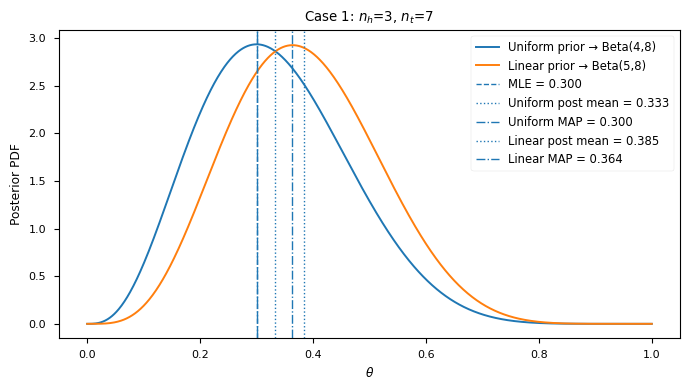

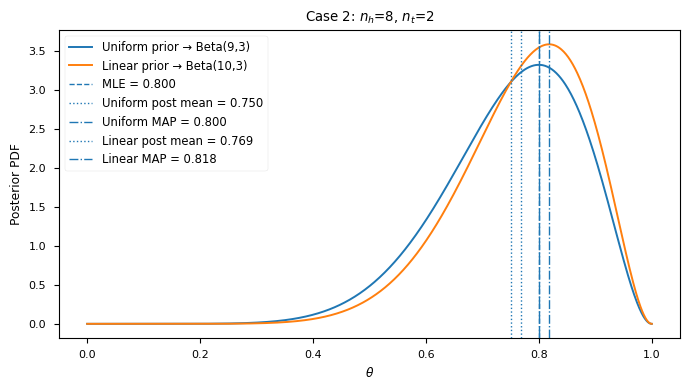


Compact results:
 case   prior  MLE  posterior_mean  posterior_map
case1 uniform  0.3        0.333333       0.300000
case1  linear  0.3        0.384615       0.363636
case2 uniform  0.8        0.750000       0.800000
case2  linear  0.8        0.769231       0.818182


In [60]:
# Retry: robust code that falls back if caas_jupyter_tools is unavailable.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
import math



# Data and priors
n = 10
cases = {"case1": {"n_h": 3, "n_t": 7}, "case2": {"n_h": 8, "n_t": 2}}
priors = {"uniform": {"alpha": 1, "beta": 1}, "linear": {"alpha": 2, "beta": 1}}

results = []
theta = np.linspace(0, 1, 1001)

for name, case in cases.items():
    n_h = case["n_h"]
    n_t = case["n_t"]
    mle = n_h / n
    # Create a formatted display name
    case_display = f"Case {name[-1]}"  # "case1" -> "Case 1", "case2" -> "Case 2"
    
    for prior_name, prior in priors.items():
        a_post = prior["alpha"] + n_h
        b_post = prior["beta"] + n_t
        post_mean = a_post / (a_post + b_post)
        # MAP (mode) exists interior only if a_post>1 and b_post>1
        if a_post > 1 and b_post > 1:
            post_map = (a_post - 1) / (a_post + b_post - 2)
        else:
            if a_post <= 1 and b_post <= 1:
                post_map = np.nan
            elif a_post <= 1:
                post_map = 0.0
            else:
                post_map = 1.0
        pdf_vals = beta.pdf(theta, a_post, b_post)
        results.append({
            "case": name,
            "case_display": case_display,  # Add formatted name for plots
            "n_h": n_h,
            "n_t": n_t,
            "prior": prior_name,
            "alpha_post": a_post,
            "beta_post": b_post,
            "MLE": mle,
            "post_mean": post_mean,
            "post_map": post_map,
            "theta_grid": theta,
            "pdf_vals": pdf_vals
        })

# Build a DataFrame for numeric results
df_rows = []
for r in results:
    df_rows.append({
        "case": r["case"],
        "n_h": r["n_h"],
        "n_t": r["n_t"],
        "prior": r["prior"],
        "alpha_post": r["alpha_post"],
        "beta_post": r["beta_post"],
        "MLE": r["MLE"],
        "posterior_mean": r["post_mean"],
        "posterior_map": r["post_map"]
    })
df = pd.DataFrame(df_rows)


# Create plots: one figure per case
for case_name in ["Case 1", "Case 2"]:
    plt.figure(figsize=(7, 4))
    # plot each prior's posterior for this case
    for r in results:
        if r["case_display"] == case_name:  # Use case_display instead of case
            label = f'{r["prior"].capitalize()} prior → Beta({r["alpha_post"]},{r["beta_post"]})'
            plt.plot(r["theta_grid"], r["pdf_vals"], label=label)
    # annotate MLE, posterior means and MAPs
    rows_case = [r for r in results if r["case_display"] == case_name]  # Use case_display
    mle_val = rows_case[0]["MLE"]
    plt.axvline(mle_val, linestyle='--', linewidth=1, label=f'MLE = {mle_val:.3f}')
    for r in rows_case:
        plt.axvline(r["post_mean"], linestyle=':', linewidth=1, label=f'{r["prior"].capitalize()} post mean = {r["post_mean"]:.3f}')
        if not np.isnan(r["post_map"]):
            plt.axvline(r["post_map"], linestyle='-.', linewidth=1, label=f'{r["prior"].capitalize()} MAP = {r["post_map"]:.3f}')
    plt.title(f'{case_name}: $n_h$={rows_case[0]["n_h"]}, $n_t$={rows_case[0]["n_t"]}')
    plt.xlabel(r'$\theta$')
    plt.ylabel('Posterior PDF')
    plt.legend(loc='best', fontsize='small')
    plt.tight_layout()
    plt.show()

# Also print compact numeric table
print("\nCompact results:")
print(df[['case','prior','MLE','posterior_mean','posterior_map']].to_string(index=False))

In [61]:
# Compute tests for Exercise P.2 using Python and display results.
import numpy as np
import pandas as pd
from scipy import stats

# Given sample
data = np.array([29.0651, 27.3980, 23.4346, 26.3665, 23.4994, 
                 28.6592, 25.5546, 29.4477, 28.0979, 25.2850])

n = len(data)
sample_mean = data.mean()
sample_var = data.var(ddof=1)   # sample variance (unbiased)
sample_std = data.std(ddof=1)

# Hypothesised population parameters
mu0 = 25.0
sigma0 = 2.0   # given population std dev (sqrt(4))

# Z-test (known population variance)
z_stat = (sample_mean - mu0) / (sigma0 / np.sqrt(n))
p_value_z_two_sided = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Chi-square test for variance (under normality)
chi2_stat = (n - 1) * sample_var / (sigma0**2)
df = n - 1
# two-sided p-value for variance: P(chi2 <= lower) + P(chi2 >= upper)
p_value_chi2_two_sided = 2 * min(stats.chi2.cdf(chi2_stat, df), 1 - stats.chi2.cdf(chi2_stat, df))

# Critical values for alpha=0.05
alpha = 0.05
chi2_lower = stats.chi2.ppf(alpha/2, df)
chi2_upper = stats.chi2.ppf(1 - alpha/2, df)
z_crit = stats.norm.ppf(1 - alpha/2)

# Create summary table
summary = pd.DataFrame({
    "n": [n],
    "sample_mean": [sample_mean],
    "sample_std (s)": [sample_std],
    "sample_var (s^2)": [sample_var],
    "mu0": [mu0],
    "sigma0": [sigma0],
    "z_stat": [z_stat],
    "z two-sided p-value": [p_value_z_two_sided],
    "chi2_stat": [chi2_stat],
    "chi2 two-sided p-value": [p_value_chi2_two_sided],
    "chi2_lower (alpha/2)": [chi2_lower],
    "chi2_upper (1-alpha/2)": [chi2_upper]
})
# 

# Also print compact textual conclusions
print("Numeric results:")
print(f"n = {n}")
print(f"sample mean = {sample_mean:.6f}")
print(f"sample std (ddof=1) = {sample_std:.6f}, sample var = {sample_var:.6f}")
print("\nZ-test (H0: mu = 25, known sigma = 2):")
print(f"  z = {z_stat:.6f}")
print(f"  two-sided p-value = {p_value_z_two_sided:.6g}")
print(f"  critical z (two-sided, alpha=0.05) = ±{z_crit:.6f}")
if abs(z_stat) > z_crit:
    print("  => Reject H0 on the mean at alpha=0.05 (sample mean significantly different from 25).")
else:
    print("  => Do not reject H0 on the mean at alpha=0.05.")

print("\nChi-square test for variance (H0: sigma^2 = 4):")
print(f"  chi2 = {chi2_stat:.6f}, df = {df}")
print(f"  two-sided p-value (approx) = {p_value_chi2_two_sided:.6g}")
print(f"  critical region: chi2 < {chi2_lower:.6f} or chi2 > {chi2_upper:.6f}")
if chi2_stat < chi2_lower or chi2_stat > chi2_upper:
    print("  => Reject H0 on the variance at alpha=0.05.")
else:
    print("  => Do not reject H0 on the variance at alpha=0.05.")


Numeric results:
n = 10
sample mean = 26.680800
sample std (ddof=1) = 2.204836, sample var = 4.861303

Z-test (H0: mu = 25, known sigma = 2):
  z = 2.657578
  two-sided p-value = 0.00787043
  critical z (two-sided, alpha=0.05) = ±1.959964
  => Reject H0 on the mean at alpha=0.05 (sample mean significantly different from 25).

Chi-square test for variance (H0: sigma^2 = 4):
  chi2 = 10.937931, df = 9
  two-sided p-value (approx) = 0.559975
  critical region: chi2 < 2.700389 or chi2 > 19.022768
  => Do not reject H0 on the variance at alpha=0.05.
